In [61]:
from azureml import Workspace

ws = Workspace()
ds = ws.datasets['loadPredict-Train.csv']
df = ds.to_dataframe()

In [62]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [63]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [64]:
df.shape

(614, 13)

In [65]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Checking for missing values

In [66]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [67]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


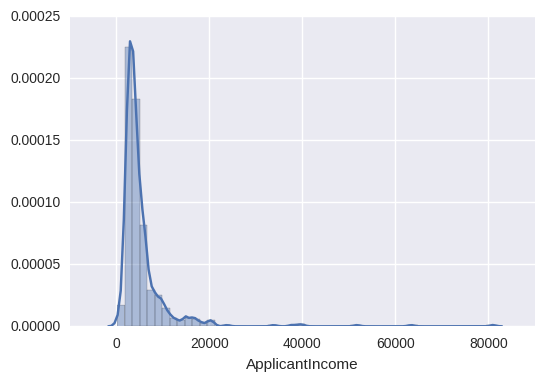

In [69]:
sns.distplot(df.ApplicantIncome,kde=True)

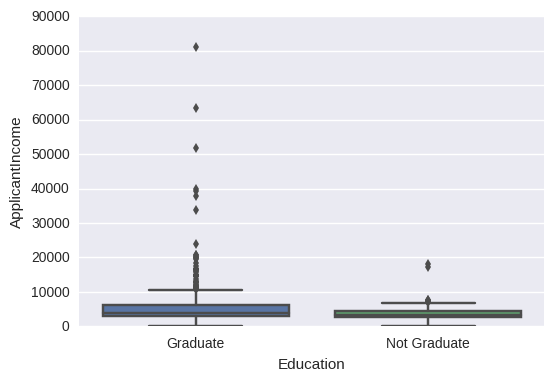

In [70]:
#Lot of outliers here
sns.boxplot(x='Education',y='ApplicantIncome',data=df)


In [71]:
#categorical
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
#numerical
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [72]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [73]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [74]:
y = df['Loan_Status']

## Encoding categorical variables

In [75]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [76]:
y = encode.fit(y).transform(y)

In [77]:
category = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'] 
encoder = LabelEncoder()
for i in category:
  df[i] = encoder.fit_transform(df[i])

In [78]:
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [79]:
df.drop(['Loan_ID','Loan_Status'],axis = 1,inplace=True)

### Lets try KMeans for clustering using only 2 categories

In [80]:
# In question-1 we used decision tree's feature_impotance_ method to see which variable are are more important. 
# Lets try to segment people using Applicant income and loan amount.

x2variable = df[['ApplicantIncome','LoanAmount']]

In [81]:
from sklearn.cluster import KMeans

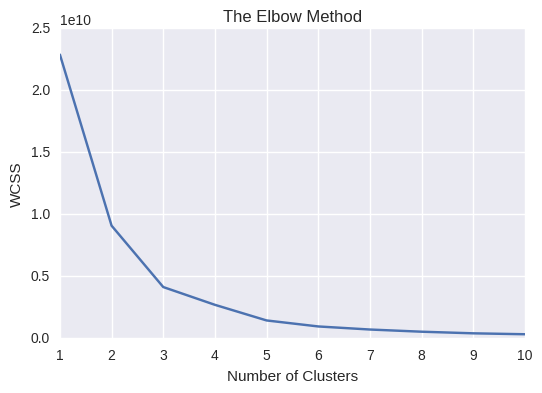

In [82]:
# Using elblow method to find the right number of clusters
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(x2variable)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [86]:
# We can probably segment customers in 5 clusters
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(x2variable)
y_kmeans

array([4, 0, 0, 0, 4, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0,
       0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 4, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 4, 0, 4,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 4, 0,
       2, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 2, 0, 4, 4, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 4, 4, 0, 4, 0, 2, 0, 4, 0, 4, 0, 4, 0, 0, 1, 4, 4, 0, 0, 0,
       4, 0, 0, 4, 0, 0, 0, 0, 4, 0, 1, 0, 4, 0, 0, 0, 4, 0, 0, 4, 0, 0, 1,
       0, 1, 0, 0, 0, 4, 0, 2, 4, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 4, 0, 4,
       0, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 0, 0, 4, 0, 4, 4, 4, 0, 0, 0, 0, 0,
       0, 2, 0, 4, 0, 2, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4, 0, 0,
       0, 0,

### Lets perform KMeans using all the variable

In [88]:
x = df

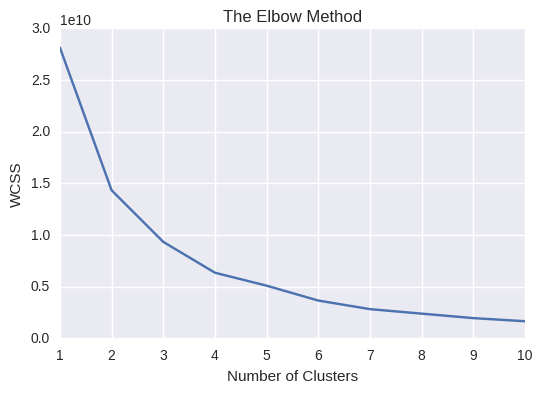

In [89]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [90]:
# We can use 6 clusters
kmeans=KMeans(n_clusters=6,init='k-means++',random_state=0)
y=kmeans.fit_predict(x)

In [91]:
y

array([5, 1, 1, 1, 5, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1,
       1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       5, 5, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 5, 1, 1, 1,
       1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 5, 5, 1, 1, 5, 1, 1, 5, 1,
       0, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 0, 1, 5, 5, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 5, 5, 1, 5, 1, 0, 1, 5, 1, 5, 1, 5, 1, 1, 4, 5, 5, 1, 1, 1,
       5, 1, 1, 5, 1, 1, 1, 1, 5, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 4, 1, 1, 1, 5, 1, 5, 5, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 5, 1, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 1, 1, 5, 1, 5,
       1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 1, 5, 1, 1, 5, 5, 1, 1, 1, 1, 1,
       1, 0, 1, 5, 1, 0, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 5, 1, 1, 1, 5, 1, 1, 5, 1, 1,
       1, 1,

### Lets use Hierarchical Clustering

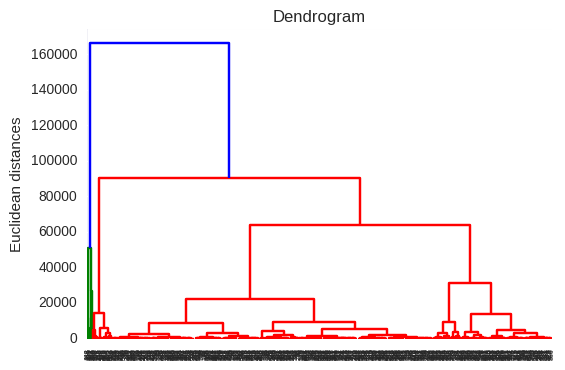

In [100]:
# Lets start with 2 variables first

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x2variable, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

In [93]:
# Using dendogram we get roughly around 4 clusters

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x2variable)

In [97]:
y_hc

array([1, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3,
       2, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 2, 3, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 3, 0, 1, 1, 3, 3, 3,
       1, 3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 0,
       3, 0, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1,
       3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 2, 3, 1, 1, 2, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3,
       3, 3,

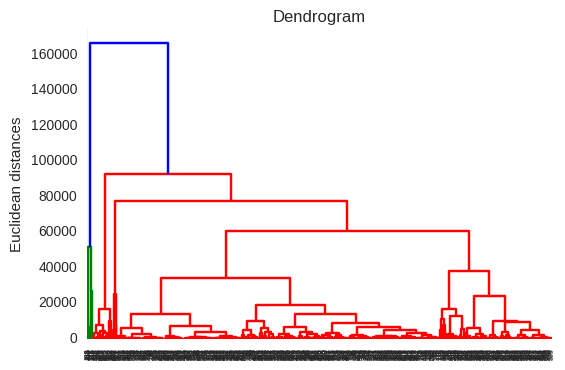

In [99]:
# lets segment customer using all the variables available 
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

In [102]:
# We get roughly around 8 clusters here
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean', linkage = 'ward')
y_cluster = hc.fit_predict(x)

In [103]:
y_cluster

array([4, 7, 7, 3, 4, 6, 3, 3, 3, 6, 3, 3, 6, 3, 3, 7, 7, 7, 7, 3, 4, 6, 3,
       3, 3, 4, 3, 3, 7, 3, 3, 7, 7, 3, 6, 3, 3, 3, 6, 3, 7, 3, 7, 3, 7, 7,
       4, 4, 3, 3, 3, 7, 7, 7, 4, 3, 3, 3, 4, 3, 3, 7, 3, 7, 7, 6, 3, 4, 4,
       7, 3, 3, 7, 7, 3, 7, 3, 3, 3, 3, 7, 7, 3, 4, 7, 3, 3, 3, 4, 6, 3, 6,
       3, 7, 7, 4, 3, 3, 7, 3, 3, 3, 2, 3, 3, 3, 4, 4, 3, 3, 4, 3, 3, 4, 7,
       2, 3, 3, 4, 4, 4, 7, 6, 7, 3, 7, 2, 3, 6, 4, 2, 3, 7, 7, 7, 6, 7, 3,
       2, 3, 3, 4, 4, 3, 4, 3, 2, 3, 6, 7, 4, 3, 4, 7, 7, 5, 4, 4, 3, 3, 3,
       4, 3, 3, 4, 3, 7, 3, 7, 4, 3, 0, 7, 6, 3, 3, 3, 6, 7, 3, 6, 3, 7, 5,
       7, 5, 7, 3, 3, 4, 7, 4, 4, 7, 7, 3, 6, 3, 3, 4, 3, 7, 7, 3, 7, 7, 7,
       3, 7, 7, 4, 3, 4, 4, 3, 3, 3, 3, 7, 3, 7, 3, 3, 4, 4, 7, 7, 4, 7, 4,
       3, 7, 3, 4, 3, 7, 4, 7, 7, 7, 6, 3, 3, 4, 3, 6, 4, 4, 3, 3, 3, 7, 3,
       3, 2, 7, 4, 4, 2, 7, 6, 3, 7, 4, 4, 3, 7, 3, 7, 3, 7, 4, 3, 3, 7, 3,
       3, 3, 2, 7, 3, 3, 3, 3, 2, 3, 3, 3, 7, 4, 3, 7, 3, 4, 3, 7, 4, 7, 3,
       3, 3,

#### We can use these models to segment our customers into different clusters. 